<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import make_env

In [4]:
env, agents = make_env.make_env_agents(agentnames = ['dummy_fixed_prices', 'dummy_fixed_prices_adaptive']
, first_file = 'data/competitionsample_3', second_file='data/competitionsample_2', third_file='data/competitionsample_1')

# you can replace the agentnames to match whatever agentfiles you create. 
# you can use the same agentnames for both agents

In [5]:
T = 500

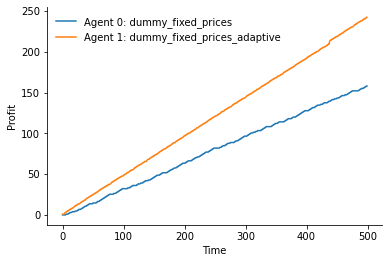

last (item bought, agent bought from, prices):  (0, 1, [[0.97498204, 4.19529964], [0.8782079691375538, 3.7788855851825853]])
current_profit per agent:  [157.94709047999962, 242.29457304193141]
Cumulative buyer utility: 198.72860970039477


In [6]:
env.reset()
customer_covariates, customer_embedding, sale, profits = env.get_current_state_customer_to_send_agents()

fig, ax = plt.subplots(figsize=(20, 10))
for t in range(0, T):
    actions = [agent.action((customer_covariates, customer_embedding, sale, profits)) for agent in agents]
    customer_covariates, customer_embedding, sale, profits = env.step(actions)
    newplot = env.render(True)
    if newplot:
      display.clear_output(wait=True)
      display.display(plt.gcf())
    print('last (item bought, agent bought from, prices): ', sale)
    print('current_profit per agent: ', profits)
plt.close()
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))